# Dataset Analysis: Absenteeism at work - Predicting the occurrence of absence

---

## Author Information

- **Name**: Kacper
- **Surname**: Jarosik
- **Date**: Absenteeism at work

---

## **1. Description of the problem**

### **a) Dataset description, characteristics and data source**

#### **General description of the dataset**

The dataset offers the possibility of creating different combinations of attributes, excluding them or changing the type (categorical, total, real), depending on the purpose of the study. It was used in scientific research conducted at the Universidade Nove de Julho within the Graduate Program of Computer Science and Knowledge Management.

**Data source:** [Absenteeism at work dataset](https://archive.ics.uci.edu/dataset/445/absenteeism+at+work)

#### **Description of characteristics**

1. **Individual identification (ID)**
2. **Reason for absence (ICD)**
Absences certified by the International Code of Diseases ([ICD](http://www.leksykon.com.pl/icd.html#icd-A.html)) are divided into 21 categories:

- **I**: Certain infectious and parasitic diseases
- **II**: Neoplasms
- **III**: Diseases of the blood and blood-forming organs and immunological disorders
- **IV**: Endocrine, nutritional and metabolic diseases
- **V**: Mental and behavioral disorders
- **VI**: Diseases of the nervous system
- **VII**: Diseases of the eye and adnexa
- **VIII**: Diseases of the ear and mastoid process
- **IX**: Diseases of the circulatory system
- **X**: Diseases of the respiratory system
- **XI**: Digestive system diseases
- **XII**: Skin and subcutaneous tissue diseases
- **XIII**: Musculoskeletal and connective tissue diseases
- **XIV**: Urinary and genital system diseases
- **XV**: Pregnancy, childbirth and puerperium
- **XVI**: Perinatal conditions
- **XVII**: Congenital malformations and chromosomal abnormalities
- **XVIII**: Symptoms and abnormal test results
- **XIX**: Injuries, poisoning and effects of external causes
- **XX**: External causes of morbidity and mortality
- **XXI**: Factors influencing health status and contact with health services

Additionally, 7 categories not directly related to the ICD were distinguished:
- (22): Patient observation
- (23): Medical consultation
- (24): Blood donation
- (25): Laboratory test
- (26): Unexcused absence
- (27): Physiotherapy
- (28): Dental consultation

3. **Month of absence**
4. **Day of the week**: Monday (2), Tuesday (3), Wednesday (4), Thursday (5), Friday (6)
5. **Seasons**: summer (1), autumn (2), winter (3), spring (4)
6. **Transport costs**
7. **Distance from place of residence to place of work (in km)**
8. **Duration of service**
9. **Age**
10. **Workload (average/day)**
11. **Goal achieved**
12. **Failure to fulfill disciplinary obligation**: yes (1), no (0)
13. **Education**: high school (1), bachelor's degree (2), postgraduate studies (3), master's and doctorate (4)
14. **Son**: number of children
15. **Social Drinker**: yes (1), no (0)
16. **Social Smoker**: yes (1), no (0)
17. **Pet**: number of animals
18. **Weight**
19. **Height**
20. **Body Mass Index**
21. **Absent time (hours)**: goal

### **b) Importing the necessary libraries**

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from IPython.display import display, Markdown

### **c) Loading the dataset**
You can see that all the data is numeric

In [97]:
file_path = "data\\Absenteeism_at_work.xls"
df = pd.read_excel(file_path)
df.head(5)

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239554,97,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239554,97,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239554,97,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239554,97,0,1,2,1,0,1,90,172,30,2


## **2. Data description**

### **a) Descriptive statistics**
For each column, the following data were checked: number of data, mean, standard deviation, minimum and maximum value, and values ​​at 25, 50 and 75%.
You can see which values ​​are dominant in the set.

In [98]:
pd.set_option('display.max_columns', None)
df.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271490.235135,94.587838,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39058.116188,3.779313,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205917.000000,81.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244387.000000,93.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264249.000000,95.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294217.000000,97.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378884.000000,100.000000,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


### **b) Data visualization**
Allows insight into the histograms of each column, and their correlation grid.

Histograms allow you to observe whether the data distribution is even and which values dominate.

For readability, values for which the correlation module was less than 0.25 have been removed

Correlation allows you to highlight useful features if they correlate with the target or allows you to eliminate features that correlate with each other and duplicate the same information

array([[<AxesSubplot:title={'center':'ID'}>,
        <AxesSubplot:title={'center':'Reason for absence'}>,
        <AxesSubplot:title={'center':'Month of absence'}>,
        <AxesSubplot:title={'center':'Day of the week'}>,
        <AxesSubplot:title={'center':'Seasons'}>],
       [<AxesSubplot:title={'center':'Transportation expense'}>,
        <AxesSubplot:title={'center':'Distance from Residence to Work'}>,
        <AxesSubplot:title={'center':'Service time'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Work load Average/day '}>],
       [<AxesSubplot:title={'center':'Hit target'}>,
        <AxesSubplot:title={'center':'Disciplinary failure'}>,
        <AxesSubplot:title={'center':'Education'}>,
        <AxesSubplot:title={'center':'Son'}>,
        <AxesSubplot:title={'center':'Social drinker'}>],
       [<AxesSubplot:title={'center':'Social smoker'}>,
        <AxesSubplot:title={'center':'Pet'}>,
        <AxesSubplot:title={'center':'Weight'}

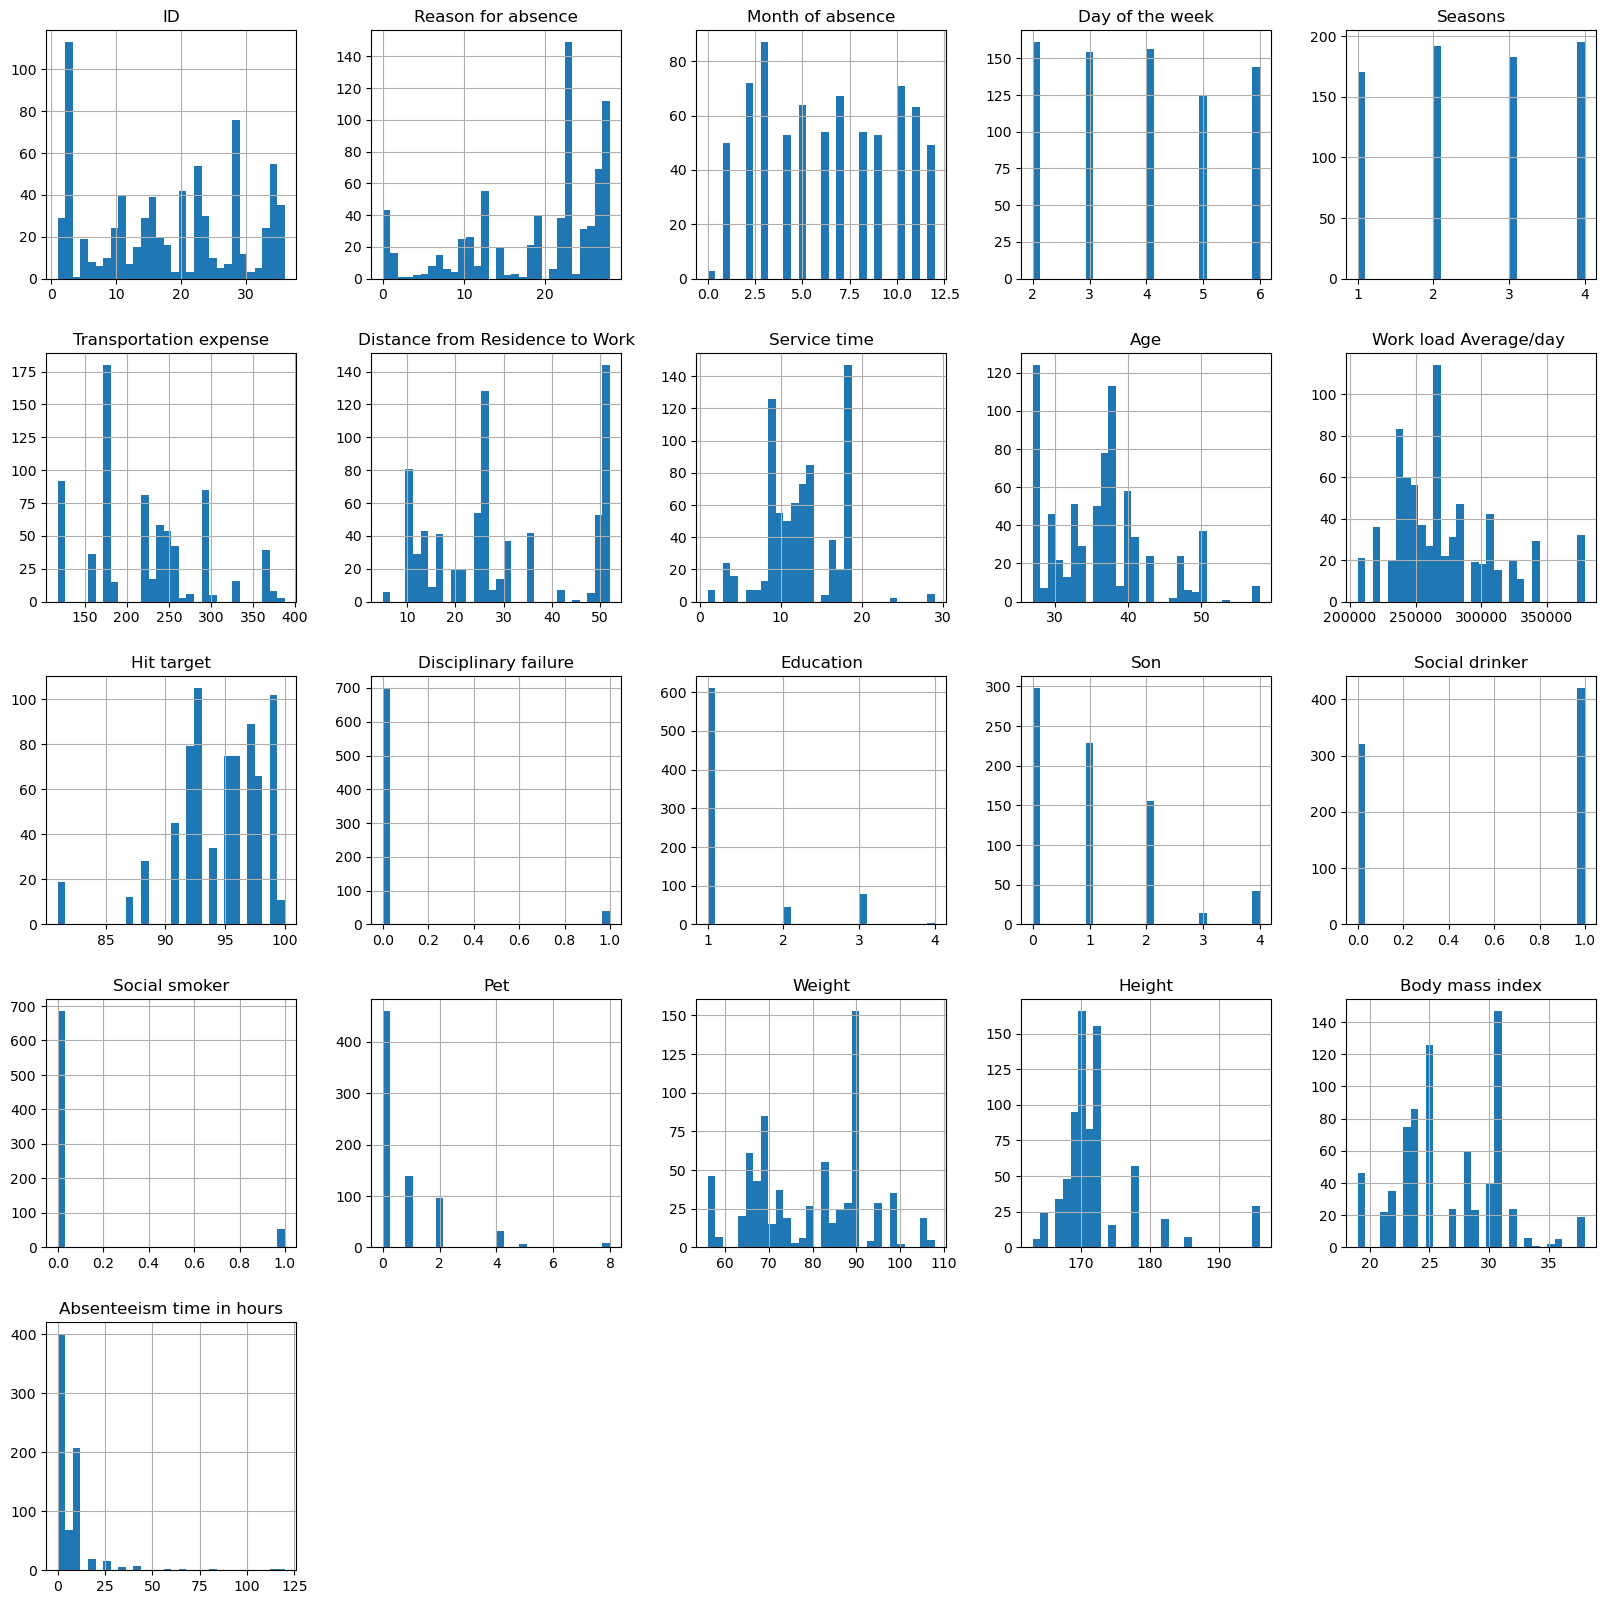

In [99]:
df.hist(bins= 30, figsize=(20,20))

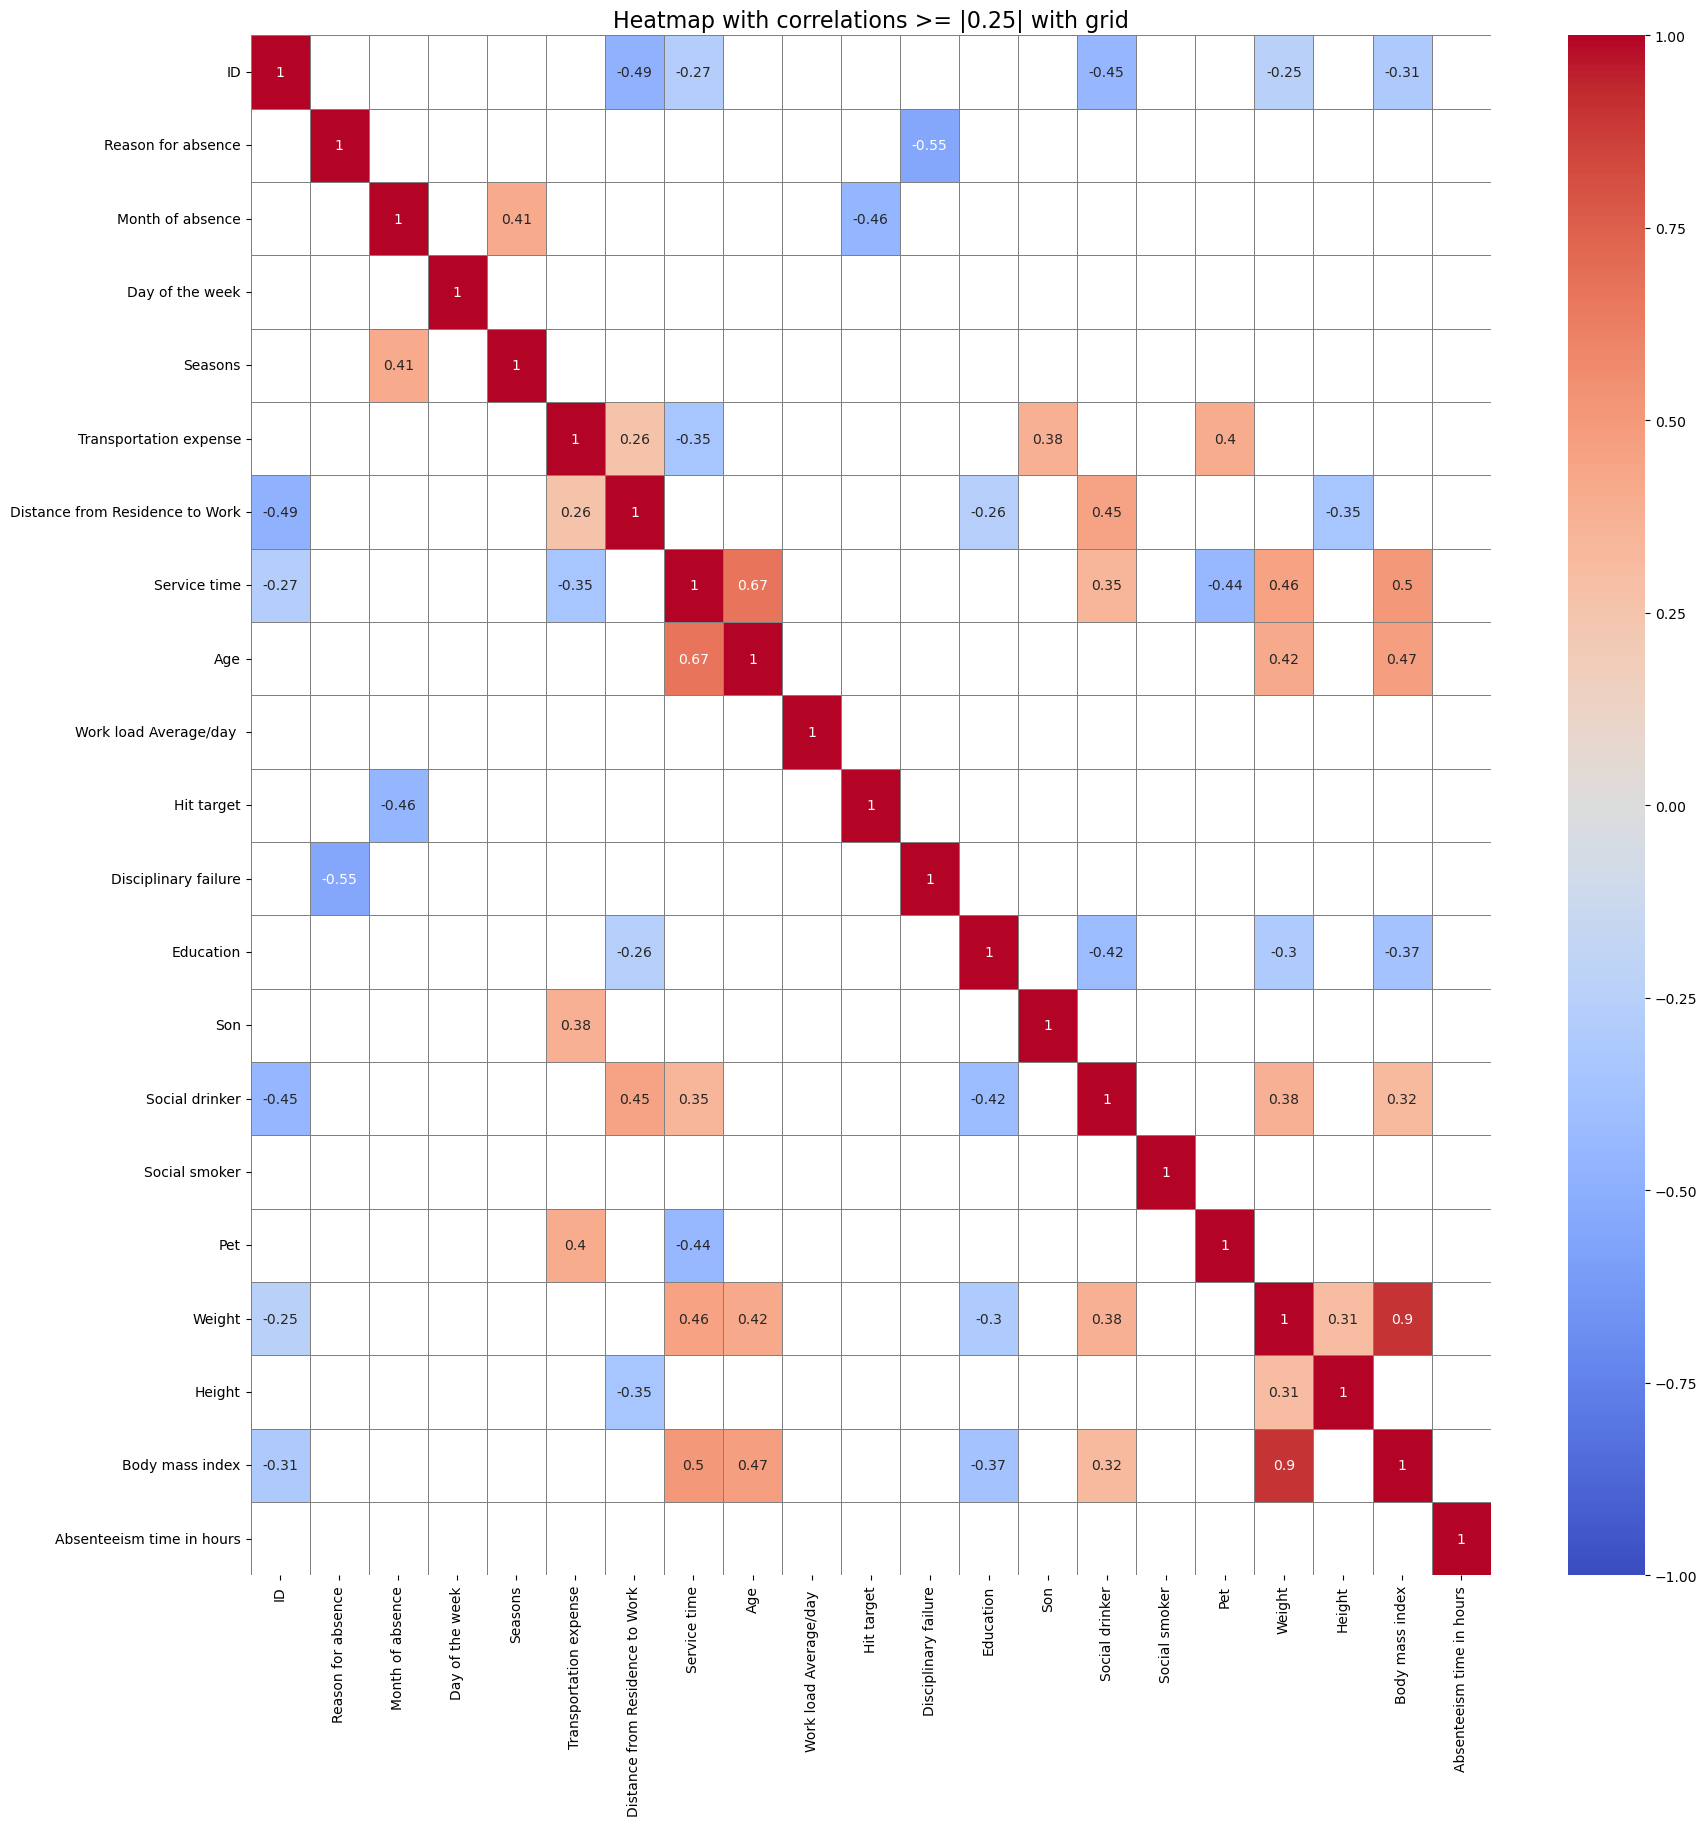

In [100]:
correlations = df.corr()
threshold = 0.25
filtered_correlations = correlations.where(np.abs(correlations) >= threshold)
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(filtered_correlations.round(2), 
            annot=True, 
            cmap="coolwarm", 
            vmin=-1, 
            vmax=1, 
            cbar=True, 
            linewidths=0.5,
            linecolor='gray')
ax.set_xticks(np.arange(filtered_correlations.shape[1]) + 0.5, minor=True)
ax.set_yticks(np.arange(filtered_correlations.shape[0]) + 0.5, minor=True)
ax.grid(which="minor", color="black", linestyle='-', linewidth=0.5)
ax.tick_params(which="minor", bottom=False, left=False)

plt.title("Heatmap with correlations >= |0.25| with grid", fontsize=16)
plt.show()

## **3. Data preparation**

### **a) Verification of data correctness and its correction**
The data is complete: Out of 740 rows in each column there are 740 values ​​different from null

The problematic data is 3x month takes the value 0, where the normal range is 1-12.

I used the replacement of 0 in months with the most frequently occurring month number in a given season in the database for a given data row.

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   ID                               740 non-null    int64
 1   Reason for absence               740 non-null    int64
 2   Month of absence                 740 non-null    int64
 3   Day of the week                  740 non-null    int64
 4   Seasons                          740 non-null    int64
 5   Transportation expense           740 non-null    int64
 6   Distance from Residence to Work  740 non-null    int64
 7   Service time                     740 non-null    int64
 8   Age                              740 non-null    int64
 9   Work load Average/day            740 non-null    int64
 10  Hit target                       740 non-null    int64
 11  Disciplinary failure             740 non-null    int64
 12  Education                        740 non-null    i

In [102]:
most_common_month_per_season = (
    df[df['Month of absence'] != 0]
    .groupby('Seasons')['Month of absence']
    .agg(lambda x: x.mode()[0])
)

dane_poczatkowe = (
    df['Month of absence'].value_counts()
    .reset_index()
    .rename(columns={'index': 'Month', 'Month of absence': 'Number of occurrences'})
    .sort_values('Month')
    .reset_index(drop=True)
)

df.loc[df['Month of absence'] == 0, 'Month of absence'] = df.loc[df['Month of absence'] == 0, 'Seasons'].map(most_common_month_per_season)

dane_po_zastapieniu = (
    df['Month of absence'].value_counts()
    .reset_index()
    .rename(columns={'index': 'Month', 'Month of absence': 'Number of occurrences'})
    .sort_values('Month')
    .reset_index(drop=True)
)

display(Markdown("### Initial data (sorted by month)"))
display(Markdown(dane_poczatkowe.to_html(index=False, escape=False)))

display(Markdown("### Data after replacing the value 0 in months (sorted by month)"))
display(Markdown(dane_po_zastapieniu.to_html(index=False, escape=False)))


### Initial data (sorted by month)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>Month</th>
      <th>Number of occurrences</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>0</td>
      <td>3</td>
    </tr>
    <tr>
      <td>1</td>
      <td>50</td>
    </tr>
    <tr>
      <td>2</td>
      <td>72</td>
    </tr>
    <tr>
      <td>3</td>
      <td>87</td>
    </tr>
    <tr>
      <td>4</td>
      <td>53</td>
    </tr>
    <tr>
      <td>5</td>
      <td>64</td>
    </tr>
    <tr>
      <td>6</td>
      <td>54</td>
    </tr>
    <tr>
      <td>7</td>
      <td>67</td>
    </tr>
    <tr>
      <td>8</td>
      <td>54</td>
    </tr>
    <tr>
      <td>9</td>
      <td>53</td>
    </tr>
    <tr>
      <td>10</td>
      <td>71</td>
    </tr>
    <tr>
      <td>11</td>
      <td>63</td>
    </tr>
    <tr>
      <td>12</td>
      <td>49</td>
    </tr>
  </tbody>
</table>

### Data after replacing the value 0 in months (sorted by month)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>Month</th>
      <th>Number of occurrences</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>1</td>
      <td>50</td>
    </tr>
    <tr>
      <td>2</td>
      <td>73</td>
    </tr>
    <tr>
      <td>3</td>
      <td>87</td>
    </tr>
    <tr>
      <td>4</td>
      <td>53</td>
    </tr>
    <tr>
      <td>5</td>
      <td>65</td>
    </tr>
    <tr>
      <td>6</td>
      <td>54</td>
    </tr>
    <tr>
      <td>7</td>
      <td>68</td>
    </tr>
    <tr>
      <td>8</td>
      <td>54</td>
    </tr>
    <tr>
      <td>9</td>
      <td>53</td>
    </tr>
    <tr>
      <td>10</td>
      <td>71</td>
    </tr>
    <tr>
      <td>11</td>
      <td>63</td>
    </tr>
    <tr>
      <td>12</td>
      <td>49</td>
    </tr>
  </tbody>
</table>

### **b) Feature selection**
First, get rid of subjective features: id, weight, height, body mass index

Get rid of values that suggest an outcome: reason for absence

In [103]:
columns_to_drop = ['ID', 'Weight', 'Height', 'Body mass index', 'Reason for absence']
df_cleaned = df.drop(columns=columns_to_drop)

df_cleaned

,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Absenteeism time in hours
0,7,3,1,289,36,13,33,239554,97,0,1,2,1,0,1,4
1,7,3,1,118,13,18,50,239554,97,1,1,1,1,0,0,0
2,7,4,1,179,51,18,38,239554,97,0,1,0,1,0,0,2
3,7,5,1,279,5,14,39,239554,97,0,1,2,1,1,0,4
4,7,5,1,289,36,13,33,239554,97,0,1,2,1,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,7,3,1,289,36,13,33,264604,93,0,1,2,1,0,1,8
736,7,3,1,235,11,14,37,264604,93,0,3,1,0,0,1,4
737,7,3,1,118,14,13,40,271219,95,0,1,1,1,0,8,0
738,2,4,2,231,35,14,39,271219,95,0,1,2,1,0,2,0


### **c) Anomaly check**
The following anomaly check did not reveal any excessively high or low values ​​that could adversely affect further analysis

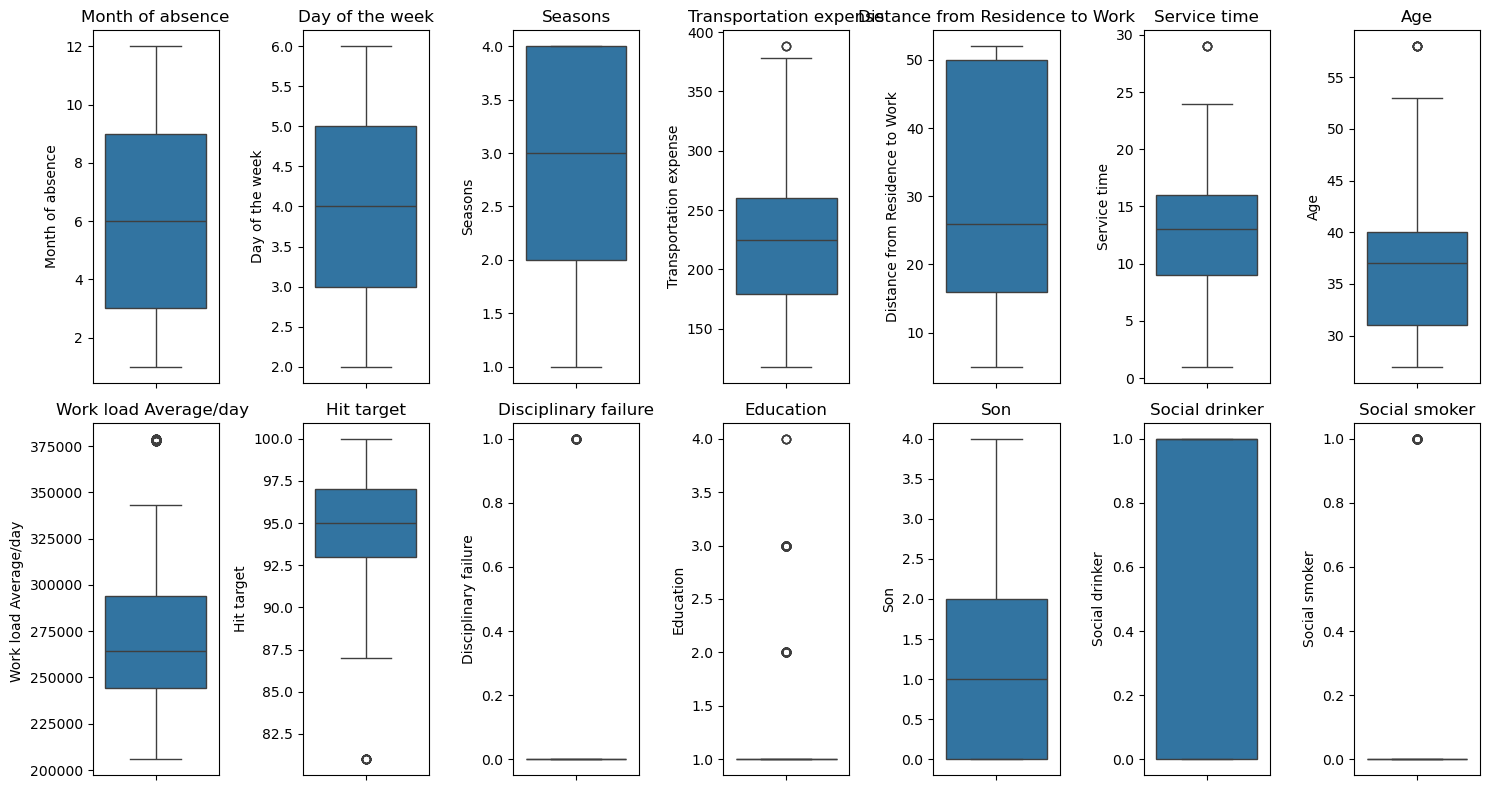

In [104]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(15, 8))
axs = axs.flatten()

for index, column in enumerate(df_cleaned.columns):
    if index < len(axs):
        sns.boxplot(y=df_cleaned[column], ax=axs[index])
        axs[index].set_title(column)

plt.tight_layout()
plt.show()


### **d) Data discretization**
Change Absenteeism time in hours to '1' if greater than 0 and to '0' if 0

This will allow detection of 2 states: present / absent

In [105]:
df_cleaned['Absenteeism time in hours'] = df_cleaned['Absenteeism time in hours'].apply(lambda x: 1 if x > 0  else 0) 

## **4. Creating Random Tree and Naive Bayes Models and Evaluating Them**

### **a) Splitting the dataset into training and test**
The data was split into training and test data in the ratio of 80:20. Due to the small size of the dataset, which can be beneficial for training.

The data is split so that a comparable portion of states 0 and 1 are in both datasets

Throughout the code, random_state=0, so that algorithms can be compared without the influence of random factors.

In [106]:
X = df_cleaned.drop(columns=['Absenteeism time in hours'])
y = df_cleaned['Absenteeism time in hours']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

sizes = pd.DataFrame({
"Set": ["Training", "Test"],
"Size": [X_train.shape[0], X_test.shape[0]]
})

proportions_all = y.value_counts(normalize=True).reset_index()
proportions_all.columns = ["Value", "Proportion"]

proportions_training = y_train.value_counts(normalize=True).reset_index()
proportions_training.columns = ["Value", "Proportion"]

proportions_test = y_test.value_counts(normalize=True).reset_index()
proportions_test.columns = ["Value", "Proportion"]

display(Markdown("### Sizes sets"))
display(Markdown(sizes.to_html(index=False, escape=False)))

display(Markdown("### Proportions in the entire dataset"))
display(Markdown(round(proportions_all,2).to_html(index=False, escape=False)))

display(Markdown("### Proportions in the training set"))
display(Markdown(round(proportions_training,2).to_html(index=False, escape=False)))

display(Markdown("### Proportions in the test set"))
display(Markdown(round(proportions_test,2).to_html(index=False, escape=False)))

### Sizes sets

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>Set</th>
      <th>Size</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Training</td>
      <td>592</td>
    </tr>
    <tr>
      <td>Test</td>
      <td>148</td>
    </tr>
  </tbody>
</table>

### Proportions in the entire dataset

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>Value</th>
      <th>Proportion</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>1</td>
      <td>0.94</td>
    </tr>
    <tr>
      <td>0</td>
      <td>0.06</td>
    </tr>
  </tbody>
</table>

### Proportions in the training set

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>Value</th>
      <th>Proportion</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>1</td>
      <td>0.94</td>
    </tr>
    <tr>
      <td>0</td>
      <td>0.06</td>
    </tr>
  </tbody>
</table>

### Proportions in the test set

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>Value</th>
      <th>Proportion</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>1</td>
      <td>0.93</td>
    </tr>
    <tr>
      <td>0</td>
      <td>0.07</td>
    </tr>
  </tbody>
</table>

### **b) Creating and training models**
- RandomForestClassifier(random_state=0, n_estimators=100)

*from 3 trees there is no difference in effectiveness but due to the small test set and not much data the value was set to 100, it does not noticeably increase the training time but may improve*
- GaussianNB()

In [107]:
rf_model = RandomForestClassifier(random_state=0, n_estimators=100)
nb_model = GaussianNB()

rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

### **c) Presentation of results and comparison of algorithms**
To compare algorithms I used: ```Accuracy, Precision, Sensitivity, F1 Score```

To visualize effectiveness I used a matrix with values: TP, TN, FP, FN

### Results Table for Random Forest and Naive Bayes Models

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>Metric</th>
      <th>Random Forest</th>
      <th>Naive Bayes</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Accuracy</td>
      <td>0.993</td>
      <td>0.905</td>
    </tr>
    <tr>
      <td>Precision</td>
      <td>0.996</td>
      <td>0.462</td>
    </tr>
    <tr>
      <td>Recall</td>
      <td>0.955</td>
      <td>0.489</td>
    </tr>
    <tr>
      <td>F1 Score</td>
      <td>0.974</td>
      <td>0.475</td>
    </tr>
  </tbody>
</table>

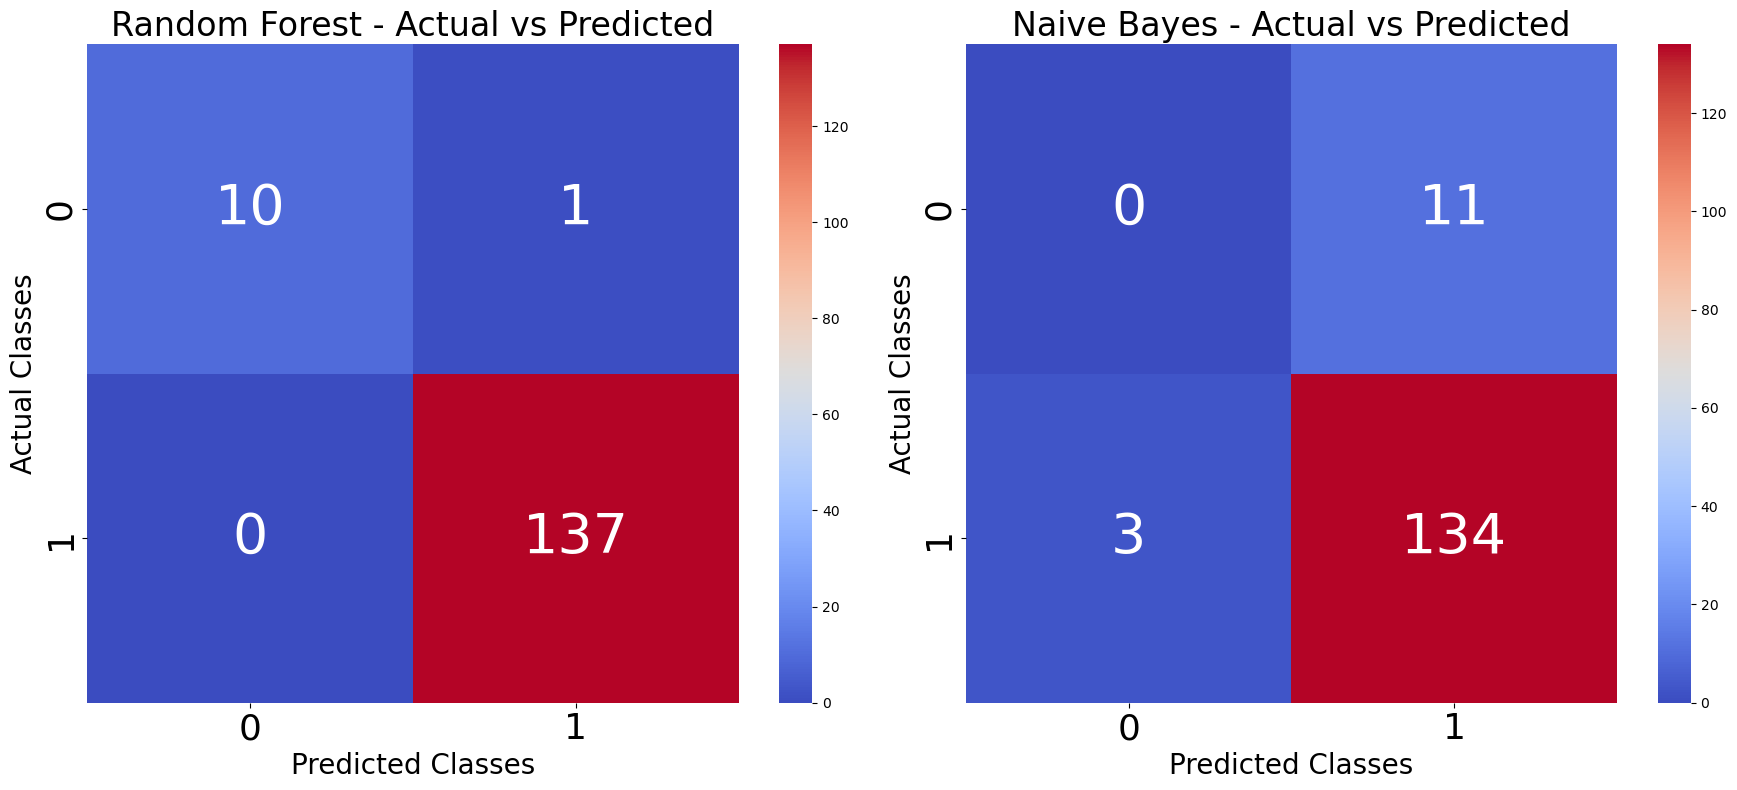

In [108]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)

accuracy_nb = accuracy_score(y_test, y_pred_nb)
report_nb = classification_report(y_test, y_pred_nb, output_dict=True)

results = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Random Forest': [
        accuracy_rf,
        report_rf['macro avg']['precision'],
        report_rf['macro avg']['recall'],
        report_rf['macro avg']['f1-score']
    ],
    'Naive Bayes': [
        accuracy_nb,
        report_nb['macro avg']['precision'],
        report_nb['macro avg']['recall'],
        report_nb['macro avg']['f1-score']
    ]
})

display(Markdown("### Results Table for Random Forest and Naive Bayes Models"))
display(Markdown(round(results, 3).to_html(index=False, escape=False)))

rf_comparison = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred_rf
})

nb_comparison = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred_nb
})

rf_heatmap = pd.crosstab(rf_comparison["Actual"], rf_comparison["Predicted"])
nb_heatmap = pd.crosstab(nb_comparison["Actual"], nb_comparison["Predicted"])

fig, axes = plt.subplots(1, 2, figsize=(18, 8))

sns.heatmap(rf_heatmap, annot=True, cmap="coolwarm", fmt="d", cbar=True, ax=axes[0], annot_kws={"size": 40})
axes[0].set_title("Random Forest - Actual vs Predicted", fontsize=24)
axes[0].set_xlabel("Predicted Classes", fontsize=20)
axes[0].set_ylabel("Actual Classes", fontsize=20)
axes[0].tick_params(axis='y', labelsize=26)
axes[0].tick_params(axis='x', labelsize=26)

sns.heatmap(nb_heatmap, annot=True, cmap="coolwarm", fmt="d", cbar=True, ax=axes[1], annot_kws={"size": 40})
axes[1].set_title("Naive Bayes - Actual vs Predicted", fontsize=24)
axes[1].set_xlabel("Predicted Classes", fontsize=20)
axes[1].set_ylabel("Actual Classes", fontsize=20)
axes[1].tick_params(axis='y', labelsize=26)
axes[1].tick_params(axis='x', labelsize=26)

plt.tight_layout()
plt.show()


### **d) Example use of classification**
For this purpose, 5 rows of data are randomly selected according to the description of the dataset specification. (they are displayed below the classification result)

In [109]:
random_data = {
    'Month of absence': np.random.randint(1, 13, 5),
    'Day of the week': np.random.randint(2, 6, 5),
    'Seasons': [], 
    'Transportation expense': np.random.randint(0, 1000, 5),
    'Distance from Residence to Work': np.random.randint(1, 150, 5),
    'Service time': np.random.randint(1, 50, 5),
    'Age': np.random.randint(18, 80, 5),
    'Work load Average/day ': np.random.randint(200, 400, 5),
    'Hit target': np.random.randint(80, 100, 5),
    'Disciplinary failure': np.random.choice([0,1],5),
    'Education': np.random.randint(1, 4, 5),
    'Son': np.random.randint(0, 4, 5),
    'Social drinker': np.random.choice([0,1],5),
    'Social smoker': np.random.choice([0,1],5),
    'Pet': np.random.randint(0, 3, 5),
}

for month in random_data['Month of absence']:
    if 10 <= month <= 12:
        random_data['Seasons'].append(4)
    elif 7 <= month <= 9:
        random_data['Seasons'].append(1)
    elif 4 <= month <= 6:
        random_data['Seasons'].append(3)
    elif 1 <= month <= 3:
        random_data['Seasons'].append(2)

random_row = pd.DataFrame(random_data)

y_pred_rf = rf_model.predict(random_row)
y_pred_nb = nb_model.predict(random_row)

def modify_predictions(predictions):
    return ['1 - absent' if pred == 1 else pred for pred in predictions]


y_pred_rf_modified = modify_predictions(y_pred_rf)
y_pred_nb_modified = modify_predictions(y_pred_nb)

predictions = pd.DataFrame({
    'Index': [0, 1, 2, 3, 4],
    'Random Forest Predictions': y_pred_rf_modified,
    'Naive Bayes Predictions': y_pred_nb_modified
})

display(Markdown("### Tabela predykcji dla modeli Random Forest i Naive Bayes"))
display(Markdown(predictions.to_html(index=False, escape=False)))
random_row

### Tabela predykcji dla modeli Random Forest i Naive Bayes

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>Index</th>
      <th>Random Forest Predictions</th>
      <th>Naive Bayes Predictions</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>0</td>
      <td>0</td>
      <td>1 - absent</td>
    </tr>
    <tr>
      <td>1</td>
      <td>1 - absent</td>
      <td>1 - absent</td>
    </tr>
    <tr>
      <td>2</td>
      <td>0</td>
      <td>1 - absent</td>
    </tr>
    <tr>
      <td>3</td>
      <td>1 - absent</td>
      <td>1 - absent</td>
    </tr>
    <tr>
      <td>4</td>
      <td>1 - absent</td>
      <td>1 - absent</td>
    </tr>
  </tbody>
</table>

,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet
0,11,2,4,430,37,8,59,298,80,1,1,1,1,0,0
1,11,3,4,101,32,15,56,208,84,0,3,3,0,0,0
2,10,5,4,620,59,5,24,256,92,1,1,3,1,1,0
3,11,5,4,331,136,27,49,286,98,0,3,3,1,1,2
4,5,2,3,576,91,14,66,304,82,0,2,1,1,1,1


### **e) Improving the result**

It is hard to improve the random tree algorithm, which fails to detect only 1 case with 3 trees. (Increasing the number of trees even to 100,000 does not increase the efficiency)

However, the results for Naive Bayes can be improved by getting rid of insignificant features to increase the impact of more significant ones.

- #### Checking the correlation of the target with the features

<AxesSubplot:>

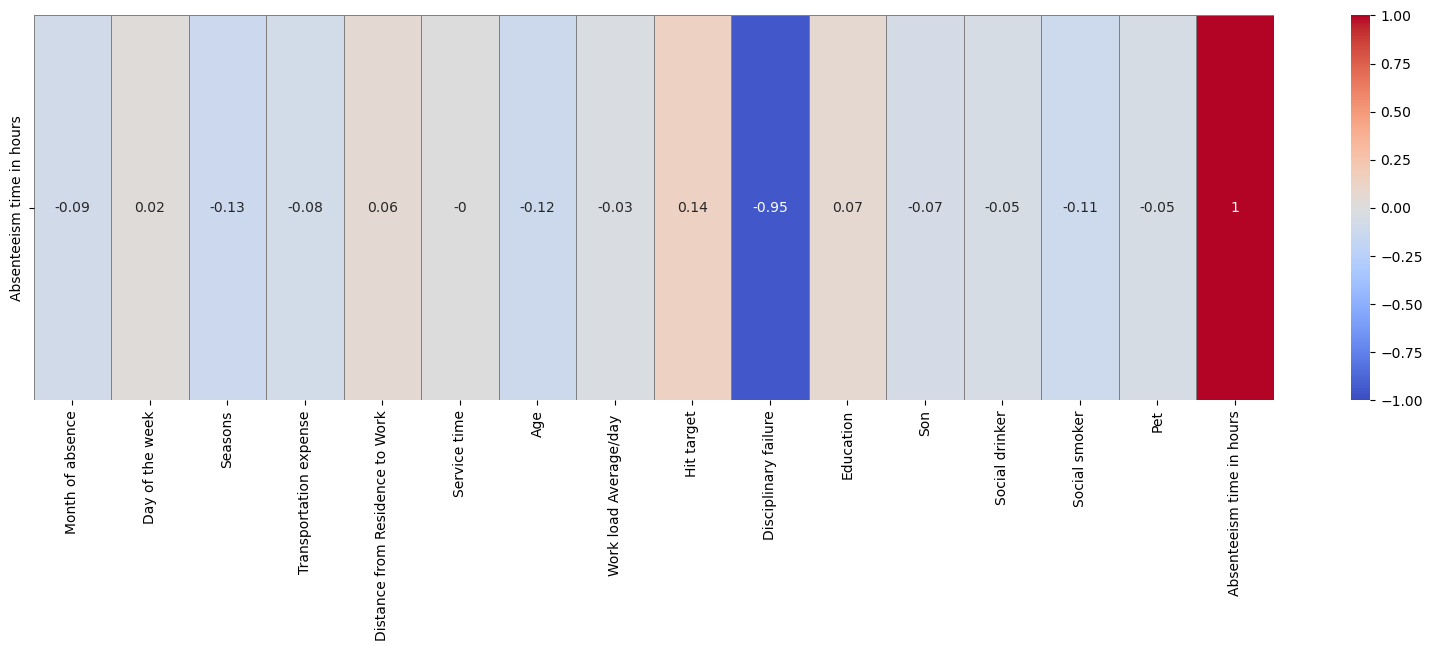

In [110]:
correlation_with_target = df_cleaned.corr()['Absenteeism time in hours']

correlation_df = correlation_with_target.to_frame().transpose()

f, ax = plt.subplots(figsize=(20, 5)) 
sns.heatmap(correlation_df.round(2), 
            annot=True, 
            cmap="coolwarm", 
            vmin=-1, 
            vmax=1, 
            cbar=True, 
            linewidths=0.5,
            linecolor='gray')

- #### removing features whose correlation modulus with the target is less than 0.1

In [111]:

correlations = df_cleaned.corr()

target_correlation = correlations['Absenteeism time in hours']

selected_columns = target_correlation[target_correlation.abs() >= 0.1].index.tolist()

df_selected = df_cleaned[selected_columns]

df_selected.head()


,Seasons,Age,Hit target,Disciplinary failure,Social smoker,Absenteeism time in hours
0,1,33,97,0,0,1
1,1,50,97,1,0,0
2,1,38,97,0,0,1
3,1,39,97,0,1,1
4,1,33,97,0,0,1


- #### podział danych na zbiory treningowe i testowe

In [112]:
X = df_selected.drop(columns=['Absenteeism time in hours'])
y = df_selected['Absenteeism time in hours']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

sizes = pd.DataFrame({
    "Dataset": ["Training", "Test"],
    "Size": [X_train.shape[0], X_test.shape[0]]
})

proportions_all = y.value_counts(normalize=True).reset_index()
proportions_all.columns = ["Value", "Proportion"]

proportions_train = y_train.value_counts(normalize=True).reset_index()
proportions_train.columns = ["Value", "Proportion"]

proportions_test = y_test.value_counts(normalize=True).reset_index()
proportions_test.columns = ["Value", "Proportion"]

display(Markdown("### Dataset Sizes"))
display(Markdown(sizes.to_html(index=False, escape=False)))

display(Markdown("### Proportions in the Entire Dataset"))
display(Markdown(round(proportions_all,2).to_html(index=False, escape=False)))

display(Markdown("### Proportions in the Training Set"))
display(Markdown(round(proportions_train,2).to_html(index=False, escape=False)))

display(Markdown("### Proportions in the Test Set"))
display(Markdown(round(proportions_test,2).to_html(index=False, escape=False)))


### Dataset Sizes

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>Dataset</th>
      <th>Size</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Training</td>
      <td>592</td>
    </tr>
    <tr>
      <td>Test</td>
      <td>148</td>
    </tr>
  </tbody>
</table>

### Proportions in the Entire Dataset

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>Value</th>
      <th>Proportion</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>1</td>
      <td>0.94</td>
    </tr>
    <tr>
      <td>0</td>
      <td>0.06</td>
    </tr>
  </tbody>
</table>

### Proportions in the Training Set

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>Value</th>
      <th>Proportion</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>1</td>
      <td>0.94</td>
    </tr>
    <tr>
      <td>0</td>
      <td>0.06</td>
    </tr>
  </tbody>
</table>

### Proportions in the Test Set

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>Value</th>
      <th>Proportion</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>1</td>
      <td>0.93</td>
    </tr>
    <tr>
      <td>0</td>
      <td>0.07</td>
    </tr>
  </tbody>
</table>

- #### creating a model

In [113]:

rf_model = RandomForestClassifier(random_state=0, n_estimators=100) 
nb_model = GaussianNB()

rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

- #### evaluation of models after modification

### Results Table for Random Forest and Naive Bayes Models

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>Metric</th>
      <th>Random Forest</th>
      <th>Naive Bayes</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Accuracy</td>
      <td>0.993</td>
      <td>0.993</td>
    </tr>
    <tr>
      <td>Precision</td>
      <td>0.996</td>
      <td>0.996</td>
    </tr>
    <tr>
      <td>Recall</td>
      <td>0.955</td>
      <td>0.955</td>
    </tr>
    <tr>
      <td>F1 Score</td>
      <td>0.974</td>
      <td>0.974</td>
    </tr>
  </tbody>
</table>

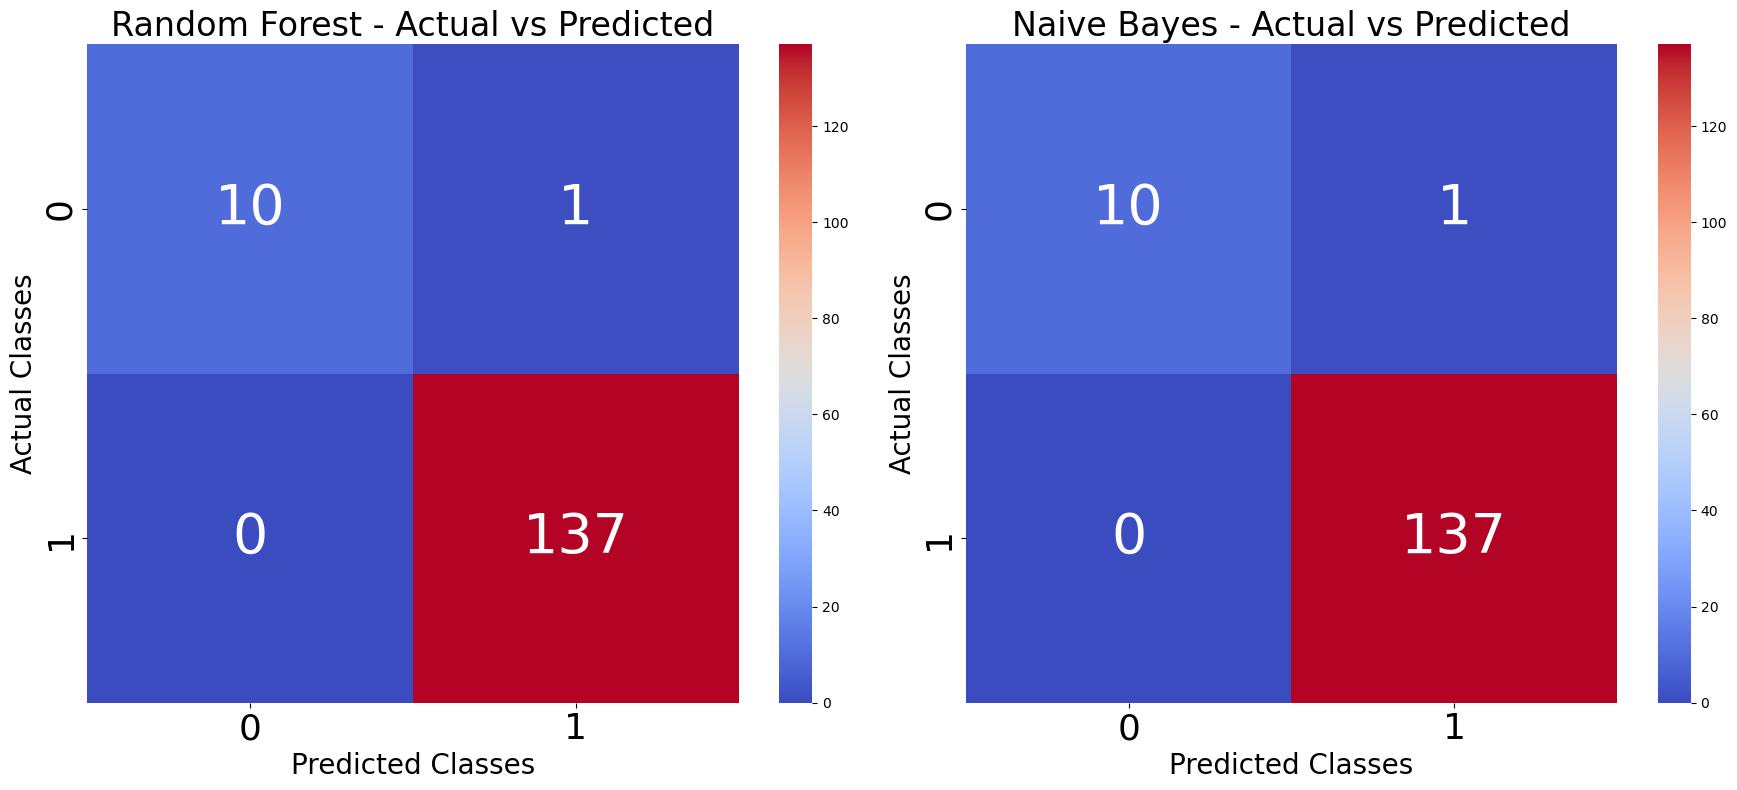

In [114]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)

accuracy_nb = accuracy_score(y_test, y_pred_nb)
report_nb = classification_report(y_test, y_pred_nb, output_dict=True)

results = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Random Forest': [
        accuracy_rf,
        report_rf['macro avg']['precision'],
        report_rf['macro avg']['recall'],
        report_rf['macro avg']['f1-score']
    ],
    'Naive Bayes': [
        accuracy_nb,
        report_nb['macro avg']['precision'],
        report_nb['macro avg']['recall'],
        report_nb['macro avg']['f1-score']
    ]
})

display(Markdown("### Results Table for Random Forest and Naive Bayes Models"))
display(Markdown(round(results,3).to_html(index=False, escape=False)))

rf_comparison = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred_rf
})

nb_comparison = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred_nb
})

rf_heatmap = pd.crosstab(rf_comparison["Actual"], rf_comparison["Predicted"])
nb_heatmap = pd.crosstab(nb_comparison["Actual"], nb_comparison["Predicted"])

fig, axes = plt.subplots(1, 2, figsize=(18, 8))

sns.heatmap(rf_heatmap, annot=True, cmap="coolwarm", fmt="d", cbar=True, ax=axes[0], annot_kws={"size": 40})
axes[0].set_title("Random Forest - Actual vs Predicted", fontsize=24)
axes[0].set_xlabel("Predicted Classes", fontsize=20)
axes[0].set_ylabel("Actual Classes", fontsize=20)
axes[0].tick_params(axis='y', labelsize=26)
axes[0].tick_params(axis='x', labelsize=26)

sns.heatmap(nb_heatmap, annot=True, cmap="coolwarm", fmt="d", cbar=True, ax=axes[1], annot_kws={"size": 40})
axes[1].set_title("Naive Bayes - Actual vs Predicted", fontsize=24)
axes[1].set_xlabel("Predicted Classes", fontsize=20)
axes[1].set_ylabel("Actual Classes", fontsize=20)
axes[1].tick_params(axis='y', labelsize=26)
axes[1].tick_params(axis='x', labelsize=26)

plt.tight_layout()
plt.show()


- #### call for corrected version

In [115]:

random_data = {
    'Seasons': np.random.randint(1, 4, 5), 
    'Age': np.random.randint(18, 80, 5),
    'Hit target': np.random.randint(80, 100, 5),
    'Disciplinary failure': np.random.choice([0,1],5),
    'Social smoker': np.random.choice([0,1],5)
}

random_row = pd.DataFrame(random_data)

y_pred_rf = rf_model.predict(random_row)
y_pred_nb = nb_model.predict(random_row)

def modify_predictions(predictions):
    return ['1 - absent' if pred == 1 else pred for pred in predictions]

y_pred_rf_modified = modify_predictions(y_pred_rf)
y_pred_nb_modified = modify_predictions(y_pred_nb)

predictions = pd.DataFrame({
    'Index': [0, 1, 2, 3, 4],
    'Random Forest Predictions': y_pred_rf_modified,
    'Naive Bayes Predictions': y_pred_nb_modified
})

display(Markdown("### Predictions Table for Random Forest and Naive Bayes Models"))
display(Markdown(predictions.to_html(index=False, escape=False)))
random_row

### Predictions Table for Random Forest and Naive Bayes Models

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>Index</th>
      <th>Random Forest Predictions</th>
      <th>Naive Bayes Predictions</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>0</td>
      <td>1 - absent</td>
      <td>1 - absent</td>
    </tr>
    <tr>
      <td>1</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <td>2</td>
      <td>1 - absent</td>
      <td>1 - absent</td>
    </tr>
    <tr>
      <td>3</td>
      <td>1 - absent</td>
      <td>1 - absent</td>
    </tr>
    <tr>
      <td>4</td>
      <td>0</td>
      <td>0</td>
    </tr>
  </tbody>
</table>

,Seasons,Age,Hit target,Disciplinary failure,Social smoker
0,3,65,87,0,1
1,1,73,91,1,0
2,2,42,81,0,0
3,1,36,85,0,1
4,1,50,95,1,0


## 5. Summarize the project

### **a) Conclusions**
#### 1. Based on 5 features: Seasons, Age, Hit target, Disciplinary failure, Social smoker, you can determine an employee's absence with precision and accuracy at the level of 99%.

#### 2. In order to create a better model, more data would be useful - especially for people who are not absent (in the entire set there are only 6% of such cases out of 740 rows)

#### 3. For a larger number of features, a better result can be obtained with the random tree algorithm, but after selecting the 5 features that most correlate with the target, the Naive Bayes algorithm performs as well as the random tree algorithm

#### 4. Absences are most common in the winter (this may be due to the holidays and New Year, as well as a higher risk of illness), and least common in the summer (this may be due to taking holidays, as well as a lower risk of illness).

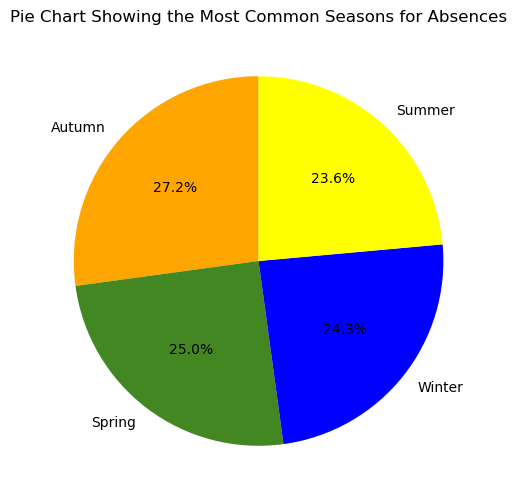

In [116]:
season_names = {1: 'Summer', 2: 'Autumn', 3: 'Winter', 4: 'Spring'}
season_colors = {'Summer': 'yellow', 'Autumn': 'orange', 'Winter': 'blue', 'Spring': '#438722'}

filtered_data = df_selected[df_selected['Absenteeism time in hours'] == 1].copy()

filtered_data['Seasons'] = filtered_data['Seasons'].map(season_names)

plt.figure(figsize=(6, 6))

seasons_count = filtered_data['Seasons'].value_counts()

colors = [season_colors.get(season, 'gray') for season in seasons_count.index]

plt.pie(seasons_count, labels=seasons_count.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title("Pie Chart Showing the Most Common Seasons for Absences")
plt.show()


#### 5. The most absent people are those aged 55-60 (probably due to a higher risk of disease), followed by those aged 25-35 (this may be due to starting a family and having young children).

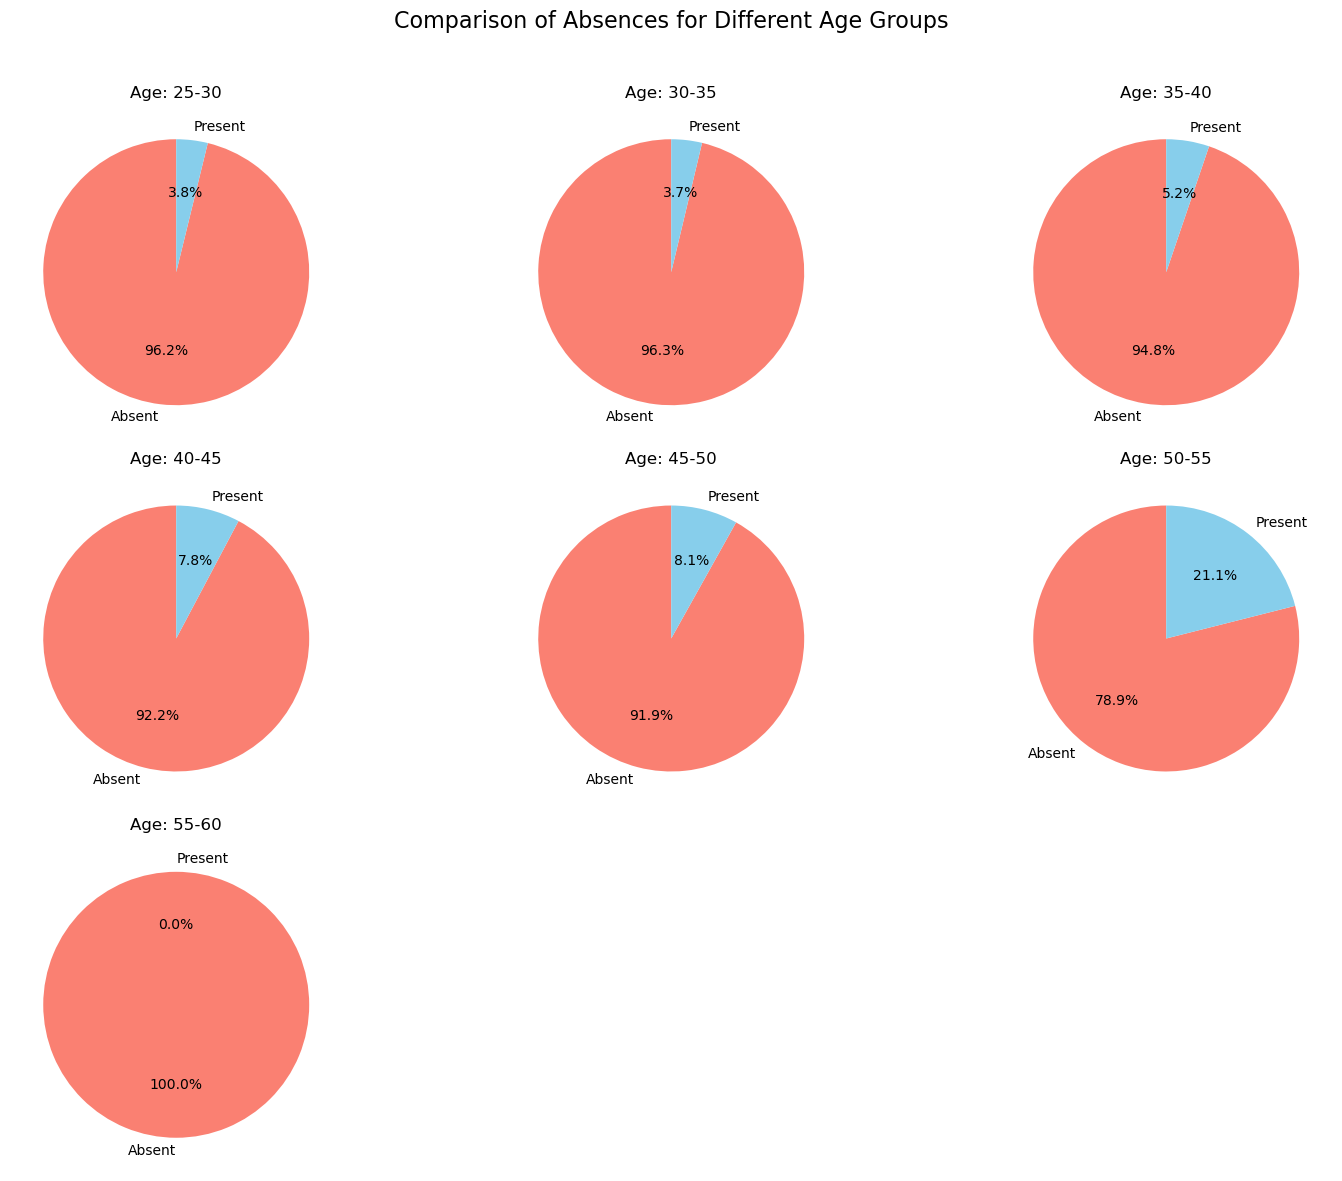

In [117]:

filtered_data = df_selected.copy()
columns_to_drop = ['Seasons', 'Hit target', 'Disciplinary failure', 'Social smoker']
filtered_data = filtered_data.drop(columns=columns_to_drop)

filtered_data_1 = filtered_data[filtered_data['Absenteeism time in hours'] == 1]
filtered_data_0 = filtered_data[filtered_data['Absenteeism time in hours'] == 0]

age_bins = [25, 30, 35, 40, 45, 50, 55, 60]

plt.figure(figsize=(15, 12))

for i, (left, right) in enumerate(zip(age_bins[:-1], age_bins[1:])):

    age_range_1 = filtered_data_1[(filtered_data_1['Age'] >= left) & (filtered_data_1['Age'] < right)]
    age_range_0 = filtered_data_0[(filtered_data_0['Age'] >= left) & (filtered_data_0['Age'] < right)]

    count_1 = len(age_range_1)
    count_0 = len(age_range_0)

    if count_1 + count_0 > 0:
        sizes = [count_1, count_0]
        labels = ['Absent', 'Present']
        colors = ['salmon', 'skyblue']

        plt.subplot(3, 3, i + 1)
        plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
        plt.title(f'Age: {left}-{right}')
    else:
        plt.subplot(3, 3, i + 1)
        plt.text(0.5, 0.5, "No Data", horizontalalignment='center', verticalalignment='center', fontsize=12)

plt.suptitle("Comparison of Absences for Different Age Groups", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

#### 6. Absent people are often unable to achieve their goals, hence this characteristic is key in determining whether someone is absent.

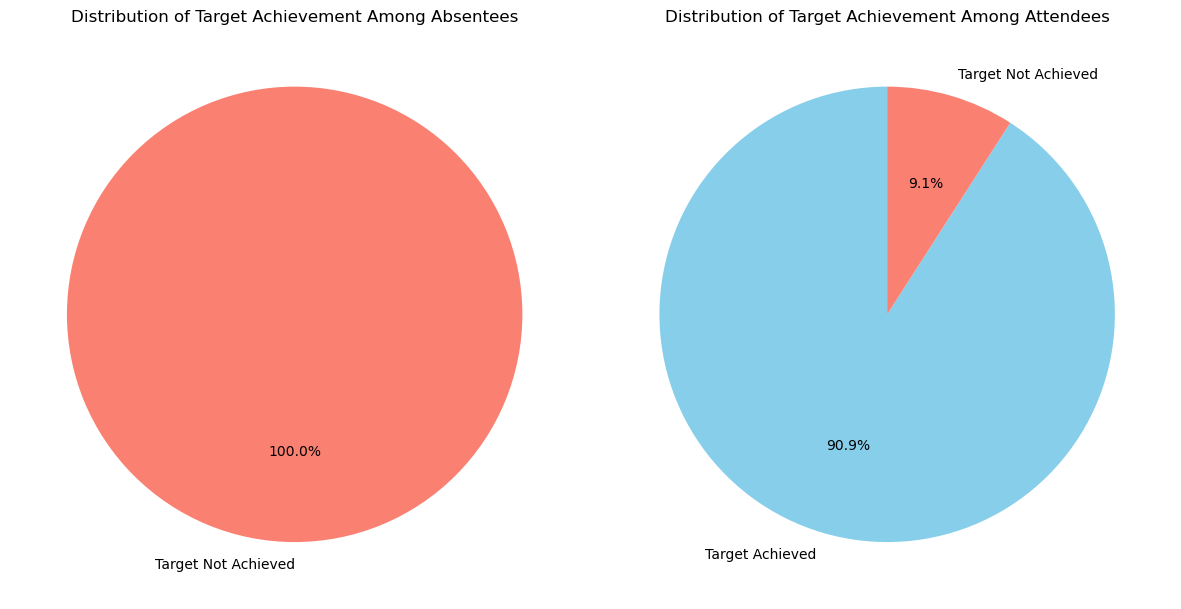

In [118]:

filtered_data_1 = df_selected[df_selected['Absenteeism time in hours'] == 1].copy()

filtered_data_0 = df_selected[df_selected['Absenteeism time in hours'] == 0].copy()

columns_to_drop = ['Seasons', 'Age', 'Hit target', 'Social smoker']
filtered_data_1 = filtered_data_1.drop(columns=columns_to_drop)
filtered_data_0 = filtered_data_0.drop(columns=columns_to_drop)

plt.figure(figsize=(12, 6))

disciplinary_count_1 = filtered_data_1['Disciplinary failure'].value_counts()

colors_1 = ['salmon', 'skyblue']

plt.subplot(1, 2, 1)
plt.pie(disciplinary_count_1, labels=['Target Not Achieved', 'Target Achieved'][:len(disciplinary_count_1)] , autopct='%1.1f%%', startangle=90, colors=colors_1)
plt.title("Distribution of Target Achievement Among Absentees")

disciplinary_count_0 = filtered_data_0['Disciplinary failure'].value_counts()

colors_0 = [ 'skyblue', 'salmon']

plt.subplot(1, 2, 2)
plt.pie(disciplinary_count_0, labels=[ 'Target Achieved','Target Not Achieved'][:len(disciplinary_count_0)], autopct='%1.1f%%', startangle=90, colors=colors_0)
plt.title("Distribution of Target Achievement Among Attendees")

plt.tight_layout()
plt.show()


#### 7. Smokers are more likely to be absent than non-smokers. This may be due to the direct impact of smoking on health.

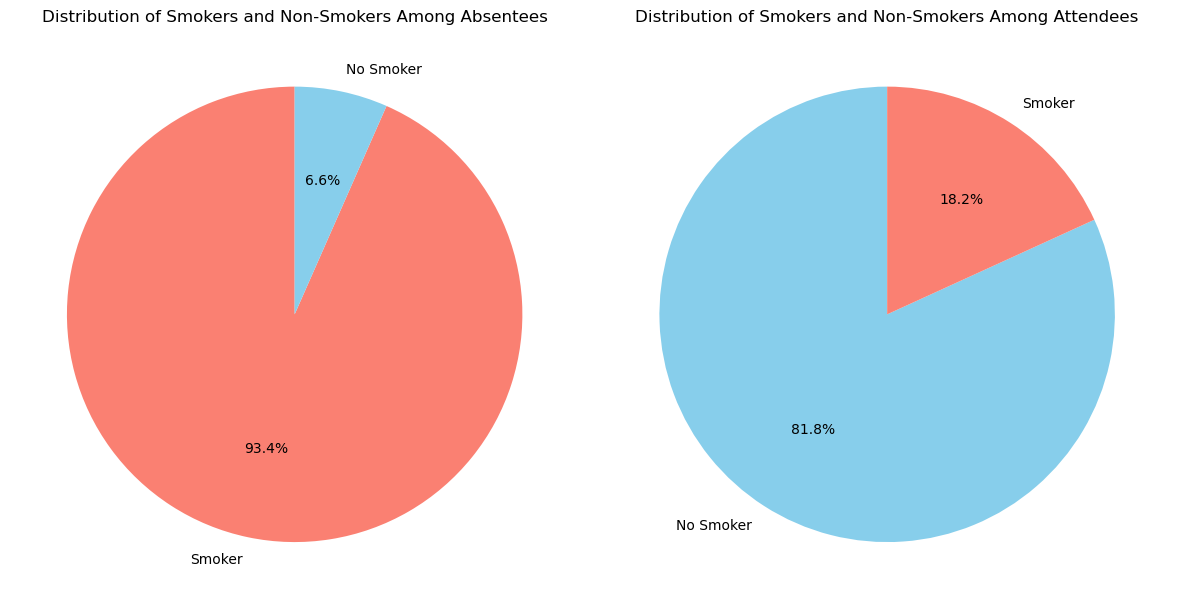

In [119]:

filtered_data_1 = df_selected[df_selected['Absenteeism time in hours'] == 1].copy()

filtered_data_0 = df_selected[df_selected['Absenteeism time in hours'] == 0].copy()

columns_to_drop = ['Seasons', 'Age', 'Hit target', 'Disciplinary failure']
filtered_data_1 = filtered_data_1.drop(columns=columns_to_drop)
filtered_data_0 = filtered_data_0.drop(columns=columns_to_drop)

plt.figure(figsize=(12, 6))

smoking_count_1 = filtered_data_1['Social smoker'].value_counts()

colors_1 = ['salmon', 'skyblue']

plt.subplot(1, 2, 1)
plt.pie(smoking_count_1, labels=['Smoker', 'No Smoker'][:len(smoking_count_1)], autopct='%1.1f%%', startangle=90, colors=colors_1)
plt.title("Distribution of Smokers and Non-Smokers Among Absentees")

smoking_count_0 = filtered_data_0['Social smoker'].value_counts()

colors_0 = ['skyblue', 'salmon']

plt.subplot(1, 2, 2)
plt.pie(smoking_count_0, labels=[ 'No Smoker', 'Smoker'][:len(smoking_count_0)], autopct='%1.1f%%', startangle=90, colors=colors_0)
plt.title("Distribution of Smokers and Non-Smokers Among Attendees")

plt.tight_layout()
plt.show()
